Demonstrating the efficacy of 

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

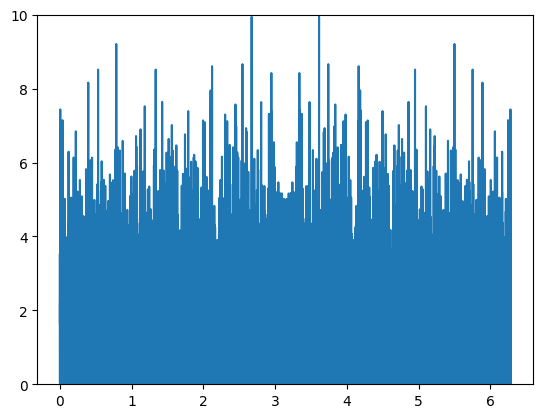

In [161]:
nSamples = 50000
x = random.randn(nSamples)

# DTFT
X = fft(x)
X_abs_sqr = ((np.abs(X))**2)/nSamples

w = 2*np.pi / nSamples * np.arange(nSamples)

plt.plot(w,X_abs_sqr)
plt.ylim(0,10)
plt.show()

Notice that even though we would expect a clean, flat line for white noise, it is noisy. This is mitigated by more samples, but still not ideal.

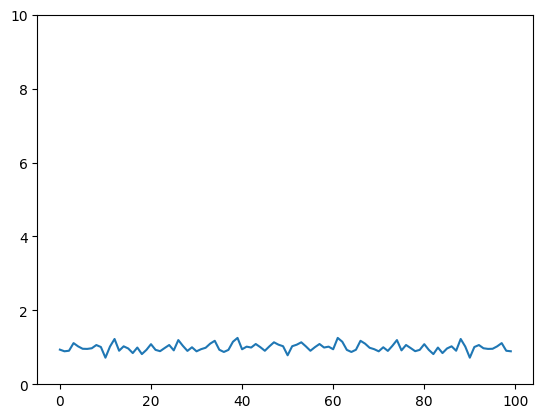

In [166]:
K = 100
L = 100

X1 = np.zeros(L) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(K):
    s = x[m:m+L]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / L
    X1 += Xs_periodogram
    
    m += L

X1 /= K

plt.plot(X1)
plt.ylim(0,10)
plt.show()

The PSD estimate is significantly closer to our expected flat line using this method.

In [ ]:
K = 100
L = 100

X1 = np.zeros(L) # will store the sum of the individual periodogram's, to be averaged
m = 0
for k in range(K):
    s = x[m:m+L]
    Xs = fft(s)
    Xs_periodogram = (np.abs(Xs)**2) / L
    X1 += Xs_periodogram
    
    m += int(L*0.8) # allow segment overlap!

X1 /= K

plt.plot(X1)
plt.ylim(0,10)
plt.show()